Currently, this is compatible with the modified local version of BBMaster, and has been run within that directory.

In [4]:
!which python

/scratch/gpfs/ip8725/conda_envs/rp_env_0.0.5.dev84/bin/python


In [12]:
#import sys
#sys.path.append('../BBMASTER/')
import bbmaster
from bbmaster import *
#from pipeline import *

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

### Generate power-law sims

In [4]:
# Generate power-law sims
#! python3 data/gen_PL_sims.py

### Compute MCM

In [17]:
bbmaster.utils

Type:        module
String form: <module 'bbmaster.utils' from '/scratch/gpfs/ip8725/conda_envs/rp_env_0.0.5.dev84/lib/python3.10/site-packages/bbmaster/utils.py'>
File:        /scratch/gpfs/ip8725/conda_envs/rp_env_0.0.5.dev84/lib/python3.10/site-packages/bbmaster/utils.py
Docstring:   <no docstring>

In [14]:
# Compute mode-coupling matrix
! python3 -m bbmaster.pipeline.mcmer --globals=data/globals.yml --output-dir=mbatch_out/ --plot

/scratch/gpfs/ip8725/conda_envs/rp_env_0.0.5.dev84//bin/python3: Error while finding module specification for 'bbmaster.pipeline.mcmer' (ModuleNotFoundError: No module named 'bbmaster.pipeline')


![title](../BBMASTER/mbatch_out/mcm/mcm.png)

In [5]:
# Filter one PL simulation
! python3 -m pipeline.filterer_mcut --globals=data/globals.yml --first-sim=0 --num-sims=1 --sim-sorter=pl_sim_names --output-dir=mbatch_out/ --m-cut 30 #--plot

In [6]:
#and compute their power spectra (before and after filtering)
! python3 -m pipeline.pcler --globals=data/globals.yml --first-sim=0 --num-sims=1 --sim-sorter=pl_sim_names_EandB --output-dir=mbatch_out/ --sim-type=input
! python3 -m pipeline.pcler --globals=data/globals.yml --first-sim=0 --num-sims=1 --sim-sorter=pl_sim_names_EandB --output-dir=mbatch_out/ --sim-type=filtered

In [7]:
import sacc
print(sacc.__version__)

0.12


In [8]:
#Plot manually

In [9]:
# Filtered
ffile = 'mbatch_out/pcl_PL_filt/plsim_1000_pcl_filt.fits'
s = sacc.Sacc.load_fits(ffile)
# Input
ffile_in = 'mbatch_out/pcl_PL_in/plsim_1000_pcl_in.fits'
sin = sacc.Sacc.load_fits(ffile_in)

In [10]:
s.tracers

{'plsim_1000_E': <sacc.tracers.MiscTracer at 0x7f29749bf0d0>,
 'plsim_1000_B': <sacc.tracers.MiscTracer at 0x7f29749bf340>}

In [11]:
sin.tracers

{'plsim_1000_E': <sacc.tracers.MiscTracer at 0x7f29749be620>,
 'plsim_1000_B': <sacc.tracers.MiscTracer at 0x7f29749bd2a0>}

In [12]:
#s.get_ell_cl?
#s.keep_selection(ell__gt=30, ell__lt=300)

plsim_1000_E plsim_1000_E
plsim_1000_E plsim_1000_B
plsim_1000_B plsim_1000_E
plsim_1000_B plsim_1000_B


/home/susannaz/.local/lib/python3.10/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "
/home/susannaz/.local/lib/python3.10/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


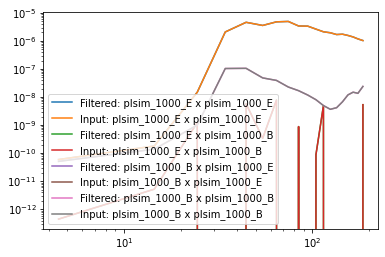

In [13]:
for tr1 in s.tracers:
    for tr2 in s.tracers:
        print(tr1, tr2)
        l, cl = s.get_ell_cl("cl_ee", tr1, tr2, return_cov=False) 
        plt.plot(l, cl, label=f'Filtered: {tr1} x {tr2}')
        lin, clin = sin.get_ell_cl("cl_ee", tr1, tr2, return_cov=False) 
        plt.plot(l, cl, label=f'Input: {tr1} x {tr2}')
plt.loglog()
plt.legend()

In [14]:
tr1 = 'plsim_1000_E'
tr2 = 'plsim_1000_B'
l, cleb = s.get_ell_cl("cl_eb", tr1, tr2, return_cov=False)
l, clee = s.get_ell_cl("cl_ee", tr1, tr1, return_cov=False)
l, clbb = s.get_ell_cl("cl_bb", tr2, tr2, return_cov=False)

In [15]:
print(clbb)
print(clee)
print(cleb)

[5.94329218e-11 1.80678476e-10 1.48361004e-08 2.08609490e-06
 4.60764756e-06 3.55942788e-06 4.78576139e-06 4.94255136e-06
 3.40639950e-06 3.36305550e-06 2.63179082e-06 2.11605348e-06
 1.95298622e-06 1.68870288e-06 1.73514289e-06 1.56558773e-06
 1.38603074e-06 1.18001212e-06 1.02999770e-06]
[5.94329218e-11 1.80678476e-10 1.48361004e-08 2.08609490e-06
 4.60764756e-06 3.55942788e-06 4.78576139e-06 4.94255136e-06
 3.40639950e-06 3.36305550e-06 2.63179082e-06 2.11605348e-06
 1.95298622e-06 1.68870288e-06 1.73514289e-06 1.56558773e-06
 1.38603074e-06 1.18001212e-06 1.02999770e-06]
[5.94329218e-11 1.80678476e-10 1.48361004e-08 2.08609490e-06
 4.60764756e-06 3.55942788e-06 4.78576139e-06 4.94255136e-06
 3.40639950e-06 3.36305550e-06 2.63179082e-06 2.11605348e-06
 1.95298622e-06 1.68870288e-06 1.73514289e-06 1.56558773e-06
 1.38603074e-06 1.18001212e-06 1.02999770e-06]


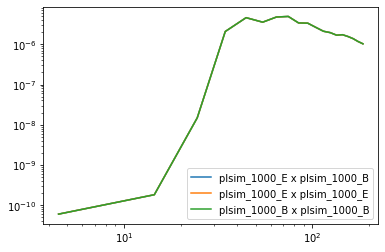

In [16]:
plt.figure()
plt.plot(l, cleb, label=f'{tr1} x {tr2}')
plt.plot(l, clee, label=f'{tr1} x {tr1}')
plt.plot(l, clbb, label=f'{tr2} x {tr2}')
plt.loglog()
plt.legend()

### Filter and compute power-spectrum for all sims

In [17]:
# Filter all PL simulations 
for sim0 in np.arange(0, 200, 10, dtype=int):
    print(sim0)
    ! python3 -m pipeline.filterer_mcut --globals=data/globals.yml --first-sim=$sim0 --num-sims=10 --sim-sorter=pl_sim_names --output-dir=mbatch_out/ --m-cut 30 #--plot

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


<Figure size 432x288 with 0 Axes>

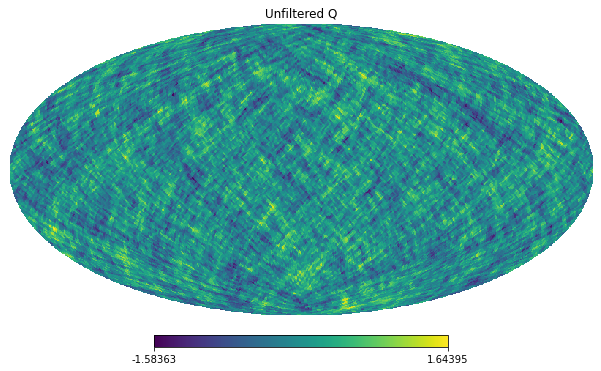

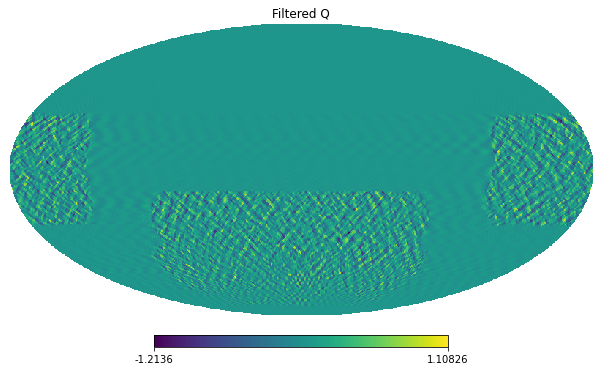

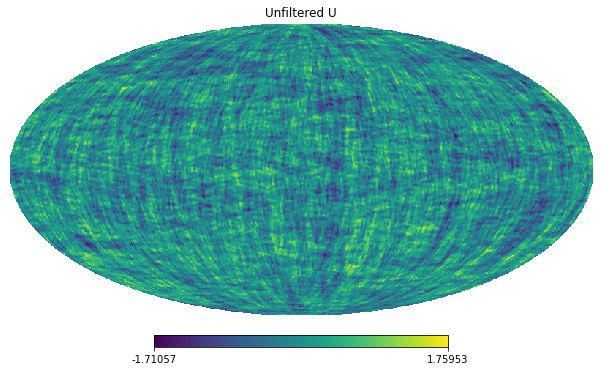

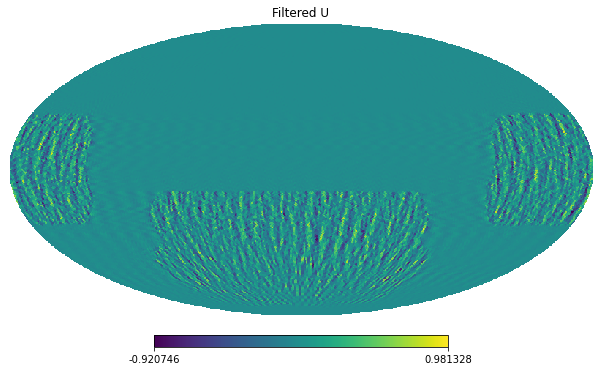

In [18]:
# Manually plot for 1 sim
from bbmaster.utils import PipelineManager
man = PipelineManager('data/globals.yml')
msk = hp.read_map(man.fname_binary_mask)
fout = 'mbatch_out/filter_PL/plsim_1000_B.fits'
fin = 'data/PL/plsim_1000_B.fits'

# Read maps
mpQ, mpU = hp.read_map(fin, field=[0, 1])
mpQf, mpUf = hp.read_map(fout, field=[0, 1])

# Plot
plt.figure()
hp.mollview(mpQ, title='Unfiltered Q')
hp.mollview(mpQf, title='Filtered Q')
hp.mollview(mpU, title='Unfiltered U')
hp.mollview(mpUf, title='Filtered U')
plt.show()

In [19]:
# Compute their power spectra (before and after filtering)
for sim0 in np.arange(0, 200, 10, dtype=int):
    print(sim0)
    ! python3 -m pipeline.pcler --globals=data/globals.yml --first-sim=$sim0 --num-sims=10 --sim-sorter=pl_sim_names_EandB --output-dir=mbatch_out/ --sim-type=input
    ! python3 -m pipeline.pcler --globals=data/globals.yml --first-sim=$sim0 --num-sims=10 --sim-sorter=pl_sim_names_EandB --output-dir=mbatch_out/ --sim-type=filtered

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


{'plsim_1000_E': <sacc.tracers.MiscTracer object at 0x7f294c3fc160>, 'plsim_1000_B': <sacc.tracers.MiscTracer object at 0x7f294c3fc1f0>}
plsim_1000_E plsim_1000_E
plsim_1000_E plsim_1000_B
plsim_1000_B plsim_1000_E
plsim_1000_B plsim_1000_B


/home/susannaz/.local/lib/python3.10/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "
/home/susannaz/.local/lib/python3.10/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


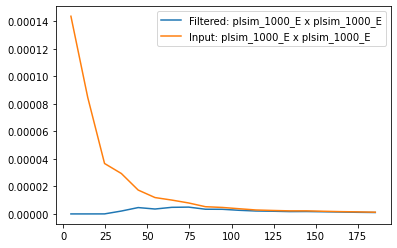

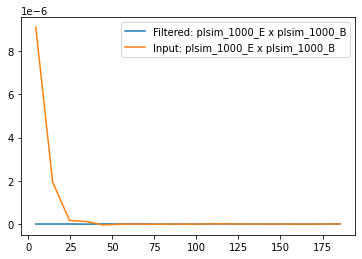

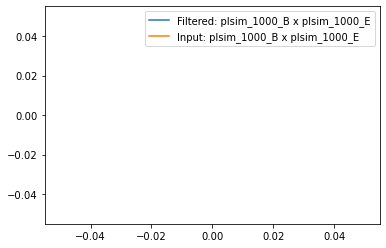

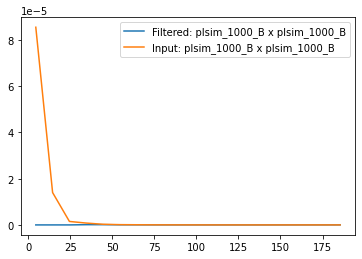

In [20]:
# Manually plot for 1 sim
import sacc
#print(sacc.__version__)

# Import sims
# Filtered
ffile = 'mbatch_out/pcl_PL_filt/plsim_1000_pcl_filt.fits'
s = sacc.Sacc.load_fits(ffile)
# Input
ffile_in = 'mbatch_out/pcl_PL_in/plsim_1000_pcl_in.fits'
sin = sacc.Sacc.load_fits(ffile_in)

print(s.tracers)
#sin.tracers
#s.get_ell_cl?
#s.keep_selection(ell__gt=30, ell__lt=300)

for tr1 in s.tracers:
    for tr2 in s.tracers:
        plt.figure()
        print(tr1, tr2)
        l, cl = s.get_ell_cl("cl_ee", tr1, tr2, return_cov=False) 
        plt.plot(l, cl, label=f'Filtered: {tr1} x {tr2}')
        lin, clin = sin.get_ell_cl("cl_ee", tr1, tr2, return_cov=False) 
        plt.plot(lin, clin, label=f'Input: {tr1} x {tr2}')
        #plt.loglog()
        plt.legend()

### Estimate transfer function

In [21]:
# Estimate transfer function
! python3 -m pipeline.transfer --globals=data/globals.yml --output-dir=mbatch_out/ --use-theory #--plot

Manually plot

In [22]:
# Reliable ells
leff = s.get_ell_cl('cl_ee', tr1, tr2)[0]
goodl = leff < 2*man.nside

In [23]:
# Import 
fname = man.get_filename('transfer_function', 'mbatch_out') # mbatch_out/transfer/transfer.npz
ffile = np.load(fname)
list(ffile.keys())

['mcm',
 'bmcm',
 'transfer_function',
 'transfer_function_error',
 'bpw_windows',
 'wcal_inv',
 'input_cl',
 'filtered_cl']

In [24]:
trans = ffile['transfer_function']
cl_in = ffile['input_cl']
cl_filt = ffile['filtered_cl']

In [25]:
# Now recover Cl_filt from Cl_in
cl_filt_r = np.einsum('ijl,kjl->kil', trans, cl_in)

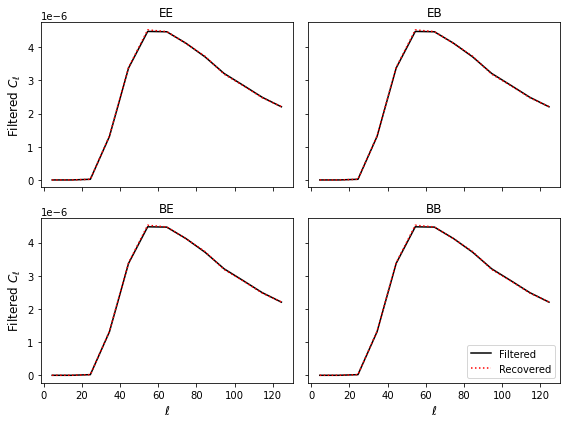

In [26]:
combs = ['EE', 'EB', 'BE', 'BB']
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey='row')
for i, comb in enumerate(combs):
    row, col = divmod(i, 2)
    ax = axs[row, col]
    ax.set_title(comb)
    ax.plot(leff[goodl], cl_filt[i, i][goodl], 'k-', label='Filtered')
    ax.plot(leff[goodl], cl_filt_r[i, i][goodl], 'r:', label='Recovered')
plt.legend()
# Add x-label to the bottom row of subplots
for col in range(2):
    axs[1, col].set_xlabel('$\ell$', fontsize=12)
# Add y-label to the left column of subplots
for row in range(2):
    axs[row, 0].set_ylabel('Filtered $C_\ell$', fontsize=12)
plt.tight_layout()
plt.show()


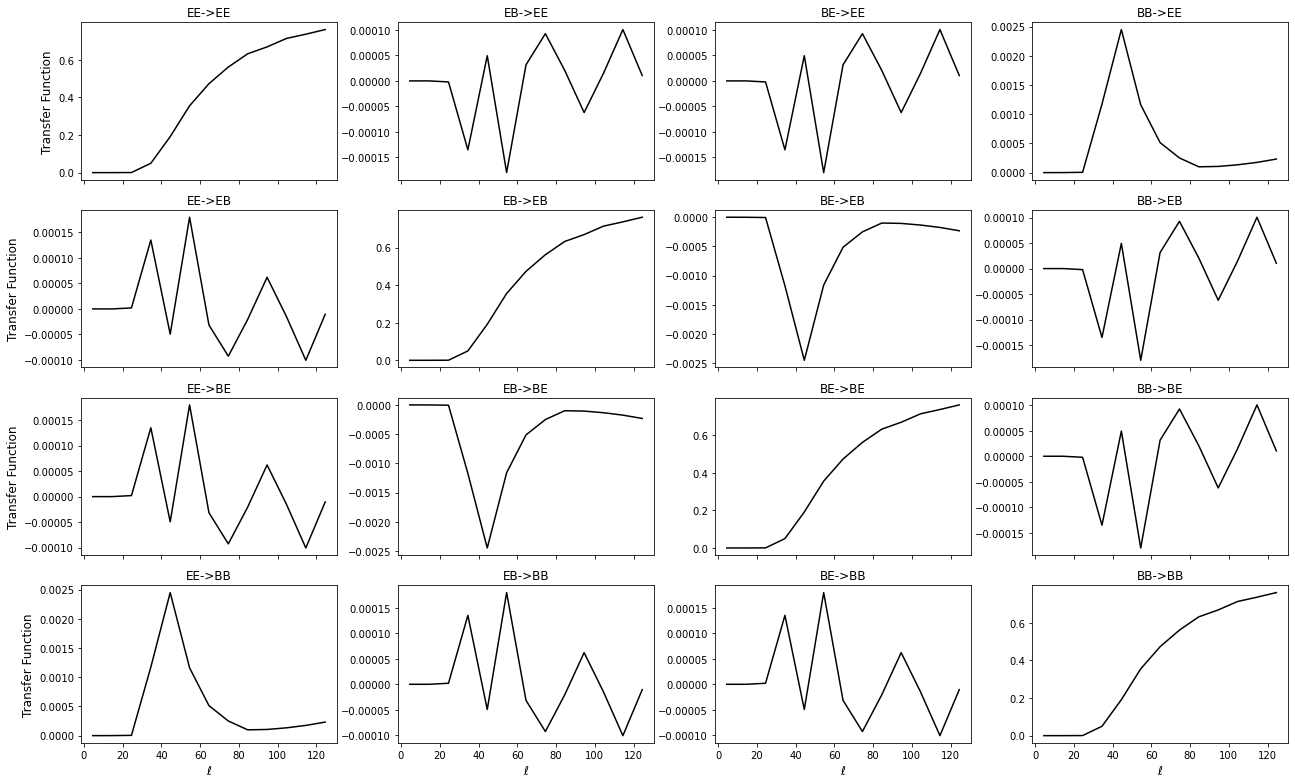

In [27]:
fig, axs = plt.subplots(4, 4, figsize=(18, 11), sharex=True)
for i1, comb1 in enumerate(combs):
    for i2, comb2 in enumerate(combs):
        ax = axs[i1, i2]
        ax.set_title(f'{comb2}->{comb1}')
        ax.plot(leff[goodl], trans[i1, i2][goodl], 'k-')
# Add x-label to the bottom row of subplots
for i2, comb2 in enumerate(combs):
    axs[3, i2].set_xlabel('$\ell$', fontsize=12)
# Add y-label to the leftmost column of subplots
for i1, comb1 in enumerate(combs):
    axs[i1, 0].set_ylabel('Transfer Function', fontsize=12)
plt.tight_layout()
plt.show()

### Filter validation sims and computer their PCL

In [28]:
# Filter all validation sims 
for sim0 in np.arange(0, 200, 10, dtype=int):
    print(sim0)
    ! python3 -m pipeline.filterer_mcut --globals=data/globals.yml --first-sim=$sim0 --num-sims=10 --sim-sorter=val_sim_names --output-dir=mbatch_out/ --m-cut 30

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


Manually plot 1 sim

<Figure size 432x288 with 0 Axes>

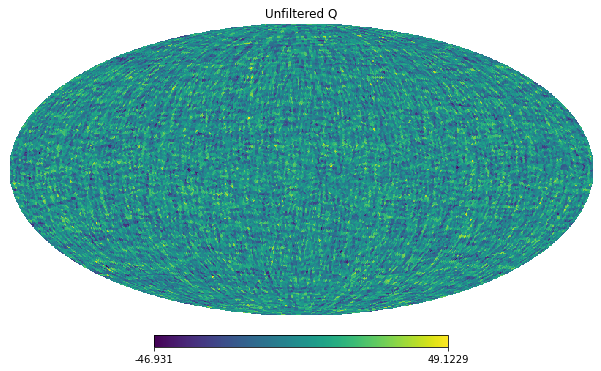

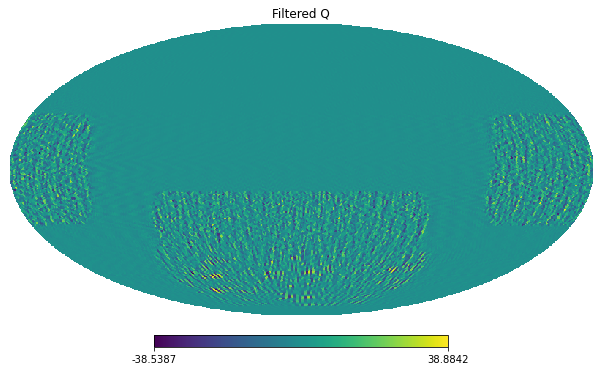

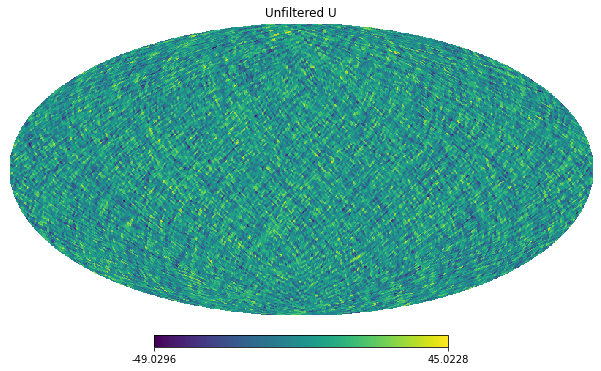

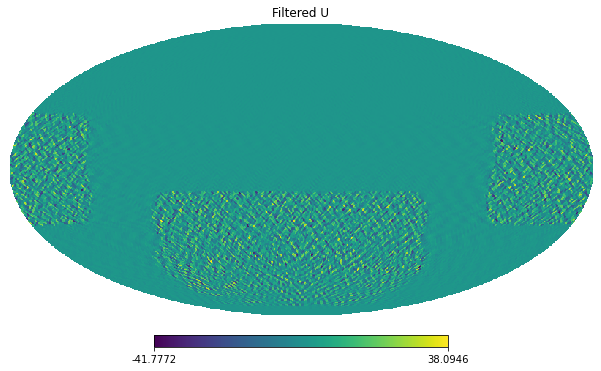

In [29]:
fin = 'data/val/valsim_1000.fits'
fout = 'mbatch_out/filter_val/valsim_1000.fits'

# Read maps
mpQ, mpU = hp.read_map(fin, field=[0, 1])
mpQf, mpUf = hp.read_map(fout, field=[0, 1])

# Plot
plt.figure()
hp.mollview(mpQ, title='Unfiltered Q')
hp.mollview(mpQf, title='Filtered Q')
hp.mollview(mpU, title='Unfiltered U')
hp.mollview(mpUf, title='Filtered U')
plt.show()

In [30]:
# Estimate their pseudo-C_ells before and after filtering, and their decoupled versions
# Filter all validation sims 
for sim0 in np.arange(0, 200, 10, dtype=int):
    print(sim0)
    ! python3 -m pipeline.pcler --globals=data/globals.yml --first-sim=$sim0 --num-sims=10 --sim-sorter=val_sim_names --output-dir=mbatch_out/ --sim-type=input
    ! python3 -m pipeline.pcler --globals=data/globals.yml --first-sim=$sim0 --num-sims=10 --sim-sorter=val_sim_names --output-dir=mbatch_out/ --sim-type=filtered
    ! python3 -m pipeline.pcler --globals=data/globals.yml --first-sim=$sim0 --num-sims=10 --sim-sorter=val_sim_names --output-dir=mbatch_out/ --sim-type=decoupled #--mcm=mbatch_out/transfer.npz

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


Manually plot for 1 sim

In [31]:
# Import sims
# Filtered
vile_filt = 'mbatch_out/pcl_val_filt/valsim_1000_pcl_filt.fits'
s = sacc.Sacc.load_fits(vile_filt)
# Input
vile_in = 'mbatch_out/pcl_val_in/valsim_1000_pcl_in.fits'
sin = sacc.Sacc.load_fits(vile_in)
# Decoupled
vile_dec = 'mbatch_out/cl_val/valsim_1000_cl.fits'
sdec = sacc.Sacc.load_fits(vile_dec)

In [32]:
print(sdec.tracers)
#sin.tracers
#s.get_ell_cl?
#s.keep_selection(ell__gt=30, ell__lt=300)

{'valsim_1000': <sacc.tracers.MiscTracer object at 0x7f29742142e0>}


In [33]:
pols = ['cl_ee', 'cl_bb']

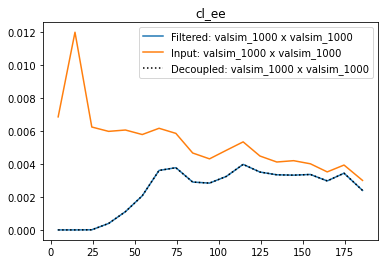

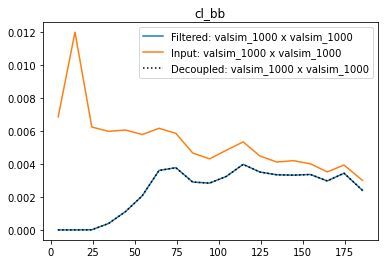

In [34]:
for pol in pols:
    plt.figure()
    plt.title(pol)
    for tr1 in s.tracers:
        l, cl = s.get_ell_cl("cl_ee", tr1, tr1, return_cov=False) 
        plt.plot(l, cl, label=f'Filtered: {tr1} x {tr1}')
        lin, clin = sin.get_ell_cl("cl_ee", tr1, tr1, return_cov=False) 
        plt.plot(lin, clin, label=f'Input: {tr1} x {tr1}')
        ldec, cldec = sdec.get_ell_cl("cl_ee", tr1, tr1, return_cov=False) 
        plt.plot(ldec, cldec, 'k:', label=f'Decoupled: {tr1} x {tr1}')
        #plt.loglog()
        plt.legend()

In [35]:
# TODO: data type (clee/clbb) does not matter?

### Validate transfer function

In [36]:
# Validate transfer function
! python3 -m pipeline.transfer_validator --globals=data/globals.yml --output-dir=mbatch_out #--mcm=mbatch_out/transfer.npz

mbatch_out
mbatch_out/transfer/transfer_validation.npz


Manually plot 

In [37]:
# Read Cls mean and std calculated above
#fname_transferval = man.get_filename('transfer_validation', 'mbatch_out')
fname_transferval = 'mbatch_out/transfer/transfer_validation.npz'
transfval = np.load(fname_transferval)

In [53]:
cl_in = transfval['input_cl']
ecl_in = transfval['error_input_cl']
cl_filt = transfval['filtered_cl']
ecl_filt = transfval['error_filtered_cl']
cl_dec = transfval['decoupled_cl']
ecl_dec = transfval['error_decoupled_cl']

In [39]:
# Compute theoretical predictions transfer function
fname_transfer = man.get_filename('transfer_function', 'mbatch_out')
transf = np.load(fname_transfer)
cl_in_th = np.einsum('ijkl,kl', transf['bmcm'], man.cls_val)
cl_filt_th = np.einsum('ijk,jk->ik', transf['transfer_function'], cl_in_th)
cl_dec_th = np.einsum('ijkl,kl', transf['bpw_windows'], man.cls_val)

In [40]:
# Determine ells to use in comparison
tf = transf['transfer_function'][0, 0]
goodl = (tf > 0.05) & (leff < 2*man.nside)

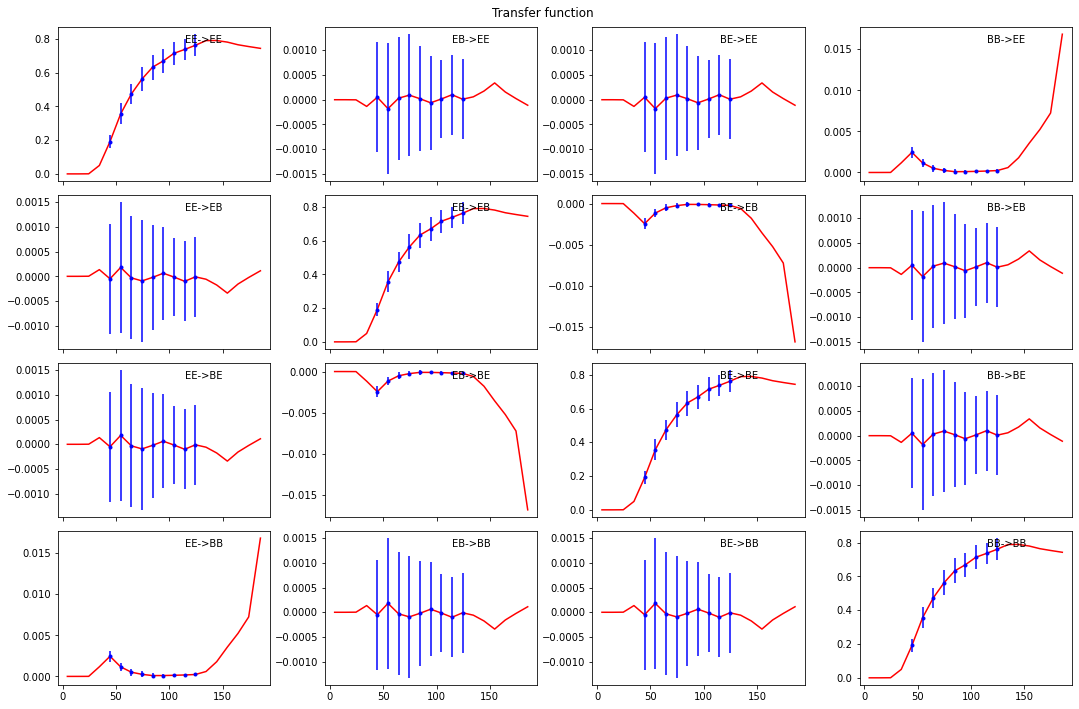

In [41]:
titles = ['EE', 'EB', 'BE', 'BB']
# Transfer function, transfer_val.pdf
fig, axes = plt.subplots(4, 4, figsize=(15, 10),sharex=True)
fig.suptitle("Transfer function")
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        ax.plot(leff, transf['transfer_function'][i, j], 'r-')
        ax.errorbar(leff[goodl], transf['transfer_function'][i, j][goodl],
                    yerr=transf['transfer_function_error'][i, j][goodl],
                    fmt='b.')
        ax.text(0.6, 0.9, f'{titles[j]}->{titles[i]}', transform=ax.transAxes)
plt.tight_layout()

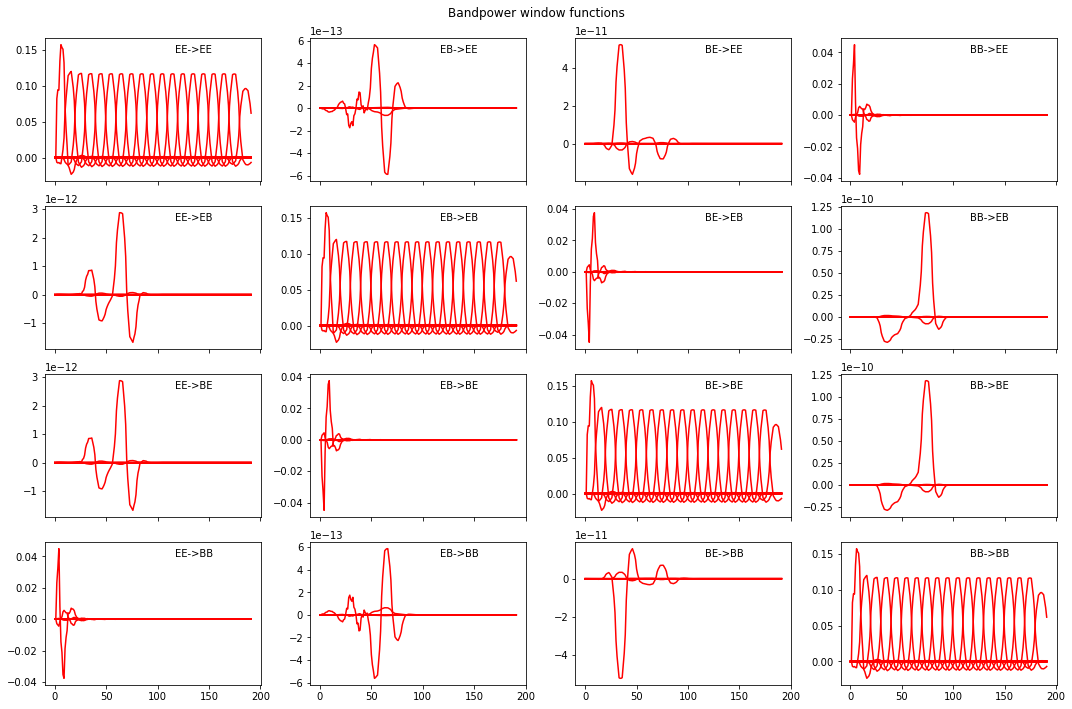

In [43]:
# Bandpower window functions #'bandpower_windows.pdf'
bpw = transf['bpw_windows']
fig, axes = plt.subplots(4, 4, figsize=(15, 10),sharex=True)
fig.suptitle("Bandpower window functions")
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        for k in range(len(leff)):
            ax.plot(bpw[i, k, j, :], 'r-')
        ax.text(0.6, 0.9, f'{titles[j]}->{titles[i]}',
                transform=ax.transAxes)
plt.tight_layout()

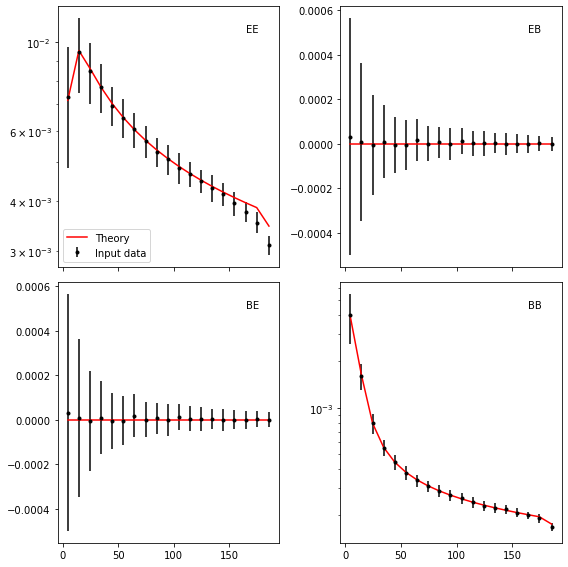

In [66]:
# Input spectra #'pcl_input_val.pdf'
fig.suptitle("Masked PCLs")
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
for i, ax in enumerate(axes.flatten()):
    ax.errorbar(leff, cl_in[i], yerr=ecl_in[i], fmt='k.', label='Input data')
    ax.plot(leff, cl_in_th[i], 'r-', label='Theory')
    if i in [0, 3]:  # Log-scale for EE and BB
        ax.set_yscale('log')
    ax.text(0.85, 0.9, titles[i], transform=ax.transAxes)
    if i == 0:
        ax.legend(loc='lower left')
plt.tight_layout()

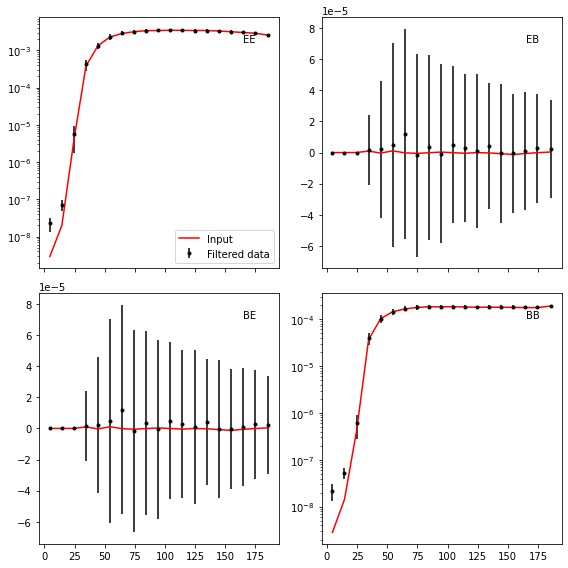

In [67]:
# Filtered spectra #'pcl_filtered_val.pdf'
fig.suptitle("Filtered PCLs")
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
for i, ax in enumerate(axes.flatten()):
    ax.errorbar(leff, cl_filt[i], yerr=ecl_filt[i], fmt='k.', label='Filtered data')
    ax.plot(leff, cl_filt_th[i], 'r-', label='Input')
    if i in [0, 3]:  # Log-scale for EE and BB
        ax.set_yscale('log')
    ax.text(0.85, 0.9, titles[i], transform=ax.transAxes)
    if i == 0:
        ax.legend(loc='lower right')
plt.tight_layout()

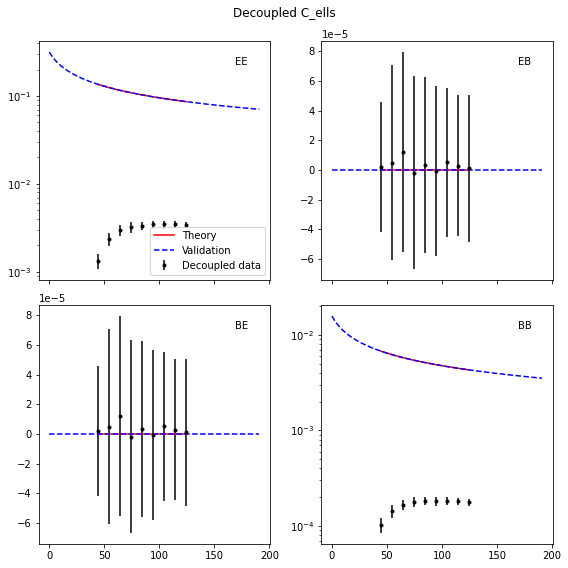

In [73]:
# Decoupled spectra #'cl_decoupled_val.pdf'
lth = np.arange(3*man.nside)
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
fig.suptitle("Decoupled C_ells")
for i, ax in enumerate(axes.flatten()):
    ax.errorbar(leff[goodl], cl_dec[i][goodl],
                yerr=ecl_dec[i][goodl], fmt='k.', label='Decoupled data')
    ax.plot(leff[goodl], cl_dec_th[i][goodl], 'r-', label='Theory')
    ax.plot(lth, man.cls_val[i], 'b--', label='Validation')
    if i in [0, 3]:  # Log-scale for EE and BB
        ax.set_yscale('log')
    if i == 0:
        ax.legend(loc='lower right')
    ax.text(0.85, 0.9, titles[i], transform=ax.transAxes)
plt.tight_layout()